In [1]:
import pristine_to_mock as ptm
import matplotlib
import matplotlib.pyplot as pyplot

## Step 0: convert to nJy and add metadata to header
### This step overwrites the "mocks.fits" file, so run this first to restart the pipeline

In [2]:
ff='/Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.fits'
ffout='/Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits'
ptm.output_pristine_fits_image(ff,ffout)

## Inspect Step 0 output

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'SimulatedImage', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')


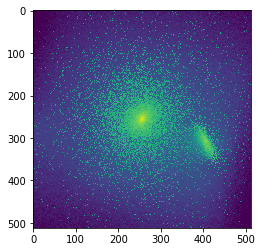

In [3]:
fo=fits.open(ffout)
fo.info()
print(fo['SimulatedImage'].header.cards)
pyplot.imshow(np.log10(fo['SimulatedImage'].data))

## Step 1a: convolve with simple PSF and inspect output

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'MockImage_Noiseless', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')
('FWHMPIX', 4.584869643280763, 'pixels')
('FWHM', 0.3, 'arcsec')
('SIGMAPIX', 1.947014869758553, 'pixels')
('SIGMA', 0.1273982700432029, 'arcsec')
('PIXSIZE', 0.06543261277660473, 'arcsec')


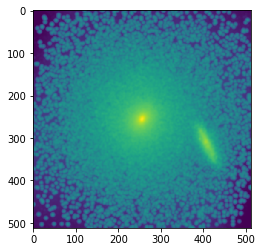

In [4]:
ptm.convolve_with_fwhm(ffout,fwhm_arcsec=0.3)
fo=fits.open(ffout)
fo.info()
print(fo['MockImage_Noiseless'].header.cards)
pyplot.imshow(np.log10(fo['MockImage_Noiseless'].data))

## Step 1b: add simple noise model (following Snyder+19); CANDELS-ish

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
  3  MockImage_SB25    1 ImageHDU        18   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'MockImage_SB25', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')
('FWHMPIX', 4.584869643280763, 'pixels')
('FWHM', 0.3, 'arcsec')
('SIGMAPIX', 1.947014869758553, 'pixels')
('SIGMA', 0.1273982700432029, 'arcsec')
('PIXSIZE', 0.06543261277660473, 'arcsec')
('SBLIM', 25.0, 'mag/arcs

/Users/gsnyder/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


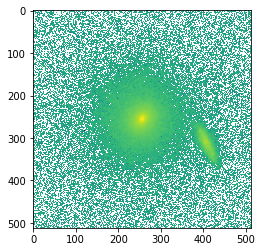

In [5]:
ptm.add_simple_noise(ffout,sb_maglim=25.0,sb_label='25')
fo=fits.open(ffout)
fo.info()
print(fo['MockImage_SB25'].header.cards)
pyplot.imshow(np.log10(fo['MockImage_SB25'].data))

## Step 1b: Now make an ultra-deep version

/Users/gsnyder/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


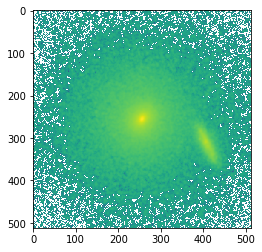

In [6]:
ptm.add_simple_noise(ffout,sb_maglim=28.0,sb_label='28')
fo=fits.open(ffout)
pyplot.imshow(np.log10(fo['MockImage_SB28'].data))

## Step 1b: How about a shallow one?

/Users/gsnyder/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


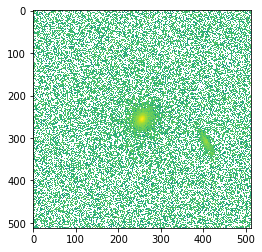

In [7]:
ptm.add_simple_noise(ffout,sb_maglim=22.0,sb_label='22')
fo=fits.open(ffout)
pyplot.imshow(np.log10(fo['MockImage_SB22'].data))

## Step 2a: Detect sources with PhotUtils

## Step 2b: Optional de-blending step

## Step 3: run StatMorph on selected source